In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 

import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, TimeDistributed
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D,Activation

In [2]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [31]:
dataset_path = r'C:\Users\sriya\Downloads\Sneha'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']
IMG_SIZE = 224
IMAGE_SIZE = [224, 224]
DIM = (IMG_SIZE, IMG_SIZE)

# apply glob module to retrieve files/pathnames  

mri_path = os.path.join(dataset_path, CLASSES[1], '*')
mri_path = glob.glob(mri_path)

In [32]:
#Performing Image Augmentation to have more data samples

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=dataset_path, target_size=DIM, batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


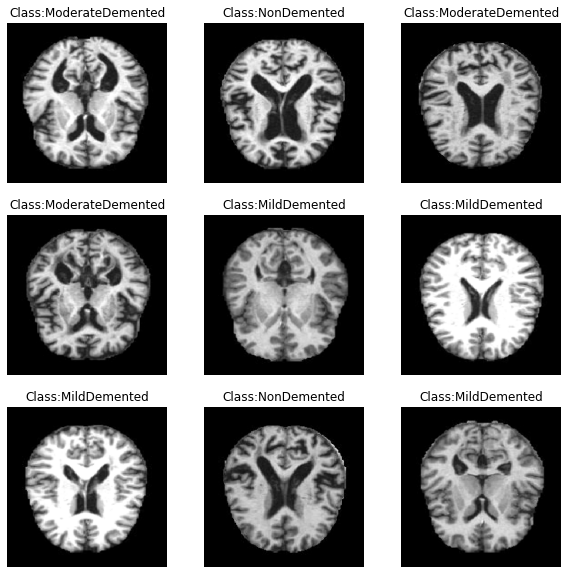

In [34]:
def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """
    
    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))
    
    # get a batch of images
    x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_data_gen)

In [35]:

train_data, train_labels = train_data_gen.next()

In [36]:
print(train_data.shape, train_labels.shape)

(6400, 224, 224, 3) (6400, 4)


In [66]:
mri_path

['C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (44).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (45).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (46).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (47).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (48).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (49).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (50).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (51).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (52).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (53).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (54).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (55).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (56).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (57).jpg',
 'C:\\Users\\sriya\\

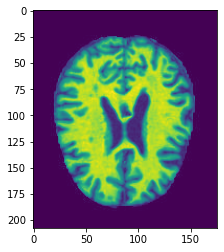

In [37]:
image = io.imread(mri_path[1])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [38]:
# importing libraries
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import skimage.color as scc

C:\Users\sriya\AppData\Local\Temp/ipykernel_2508/2802754522.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = scc.rgb2gray(image)


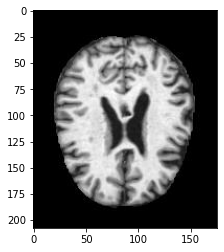

In [39]:
#normalization
gray_image = scc.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

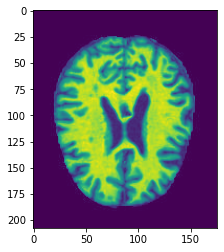

In [40]:

norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [41]:
#Splitting the data into train, test, and validation sets

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [42]:
#Performing over-sampling of the data, since the classes are imbalanced

sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

(8132, 224, 224, 3) (8132, 4)


In [13]:
# OVER SAMPLING
# - validation data
val_data, val_labels = sm.fit_resample(val_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), val_labels)

val_data = val_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(val_data.shape, val_labels.shape)

(2096, 224, 224, 3) (2096, 4)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
base_model =  tf.keras.applications.MobileNet(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

In [83]:
from tensorflow.python.keras.layers import LSTM
from keras.layers import Bidirectional

In [84]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [85]:
train_data.shape

(8132, 224, 224, 3)

In [86]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM


bidLayer = Bidirectional(LSTM(10, return_sequences=True), input_shape=(224,3))

In [87]:
model = Sequential()
model.add(base_model)
model.add(TimeDistributed(LSTM(64, return_sequences=True)))
model.add(TimeDistributed(LSTM(64, return_sequences=True)))

model.add(Flatten())
model.add(Dense(units=4, activation="softmax"))

In [88]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 time_distributed_10 (TimeDi  (None, 7, 7, 64)         278784    
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 7, 7, 64)         33024     
 stributed)                                                      
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 4)                 12548     
                                                      

In [89]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [90]:
#Defining other parameters for our CNN model

model = model

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), 
           tfa.metrics.F1Score(num_classes=4)]

CALLBACKS = [my_callback]


model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 time_distributed_10 (TimeDi  (None, 7, 7, 64)         278784    
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 7, 7, 64)         33024     
 stributed)                                                      
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 4)                 12548     
                                                      

In [91]:
EPOCHS = 20

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels),batch_size=32, callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/20
255/255 [==============================] - 159s 594ms/step - loss: 0.6456 - acc: 0.7104 - auc: 0.9237 - f1_score: 0.7085 - val_loss: 0.7743 - val_acc: 0.6592 - val_auc: 0.8936 - val_f1_score: 0.6683
Epoch 2/20
255/255 [==============================] - 144s 565ms/step - loss: 0.3619 - acc: 0.8398 - auc: 0.9759 - f1_score: 0.8394 - val_loss: 0.8550 - val_acc: 0.6602 - val_auc: 0.8969 - val_f1_score: 0.6799
Epoch 3/20
255/255 [==============================] - 147s 579ms/step - loss: 0.2474 - acc: 0.8988 - auc: 0.9888 - f1_score: 0.8986 - val_loss: 0.6947 - val_acc: 0.7061 - val_auc: 0.9161 - val_f1_score: 0.6816
Epoch 4/20
255/255 [==============================] - 141s 552ms/step - loss: 0.1537 - acc: 0.9429 - auc: 0.9956 - f1_score: 0.9429 - val_loss: 0.6787 - val_acc: 0.7188 - val_auc: 0.9302 - val_f1_score: 0.7378
Epoch 5/20
255/255 [==============================] - 138s 540ms/step - loss: 0.1081 - acc: 0.9579 - auc: 0.9977 - f1_score: 0.9579 - val_loss: 0.8161 - val_acc

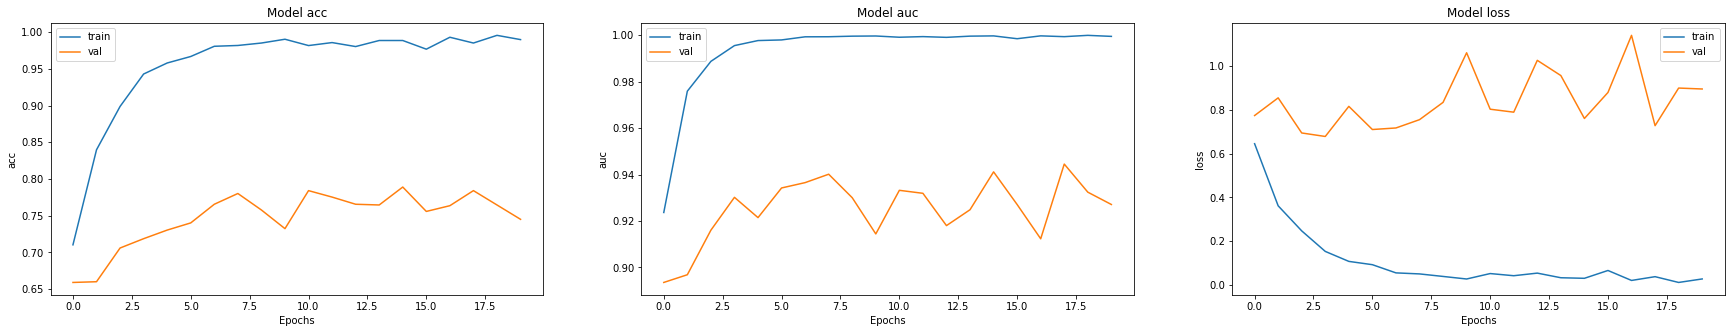

In [92]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [93]:
#Evaluating the model on the data

train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data, test_labels)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

40/40 [==============================] - 17s 432ms/step - loss: 0.6862 - acc: 0.8141 - auc: 0.9464 - f1_score: 0.7679
Training Accuracy: 98.55%
Validation Accuracy: 74.51%
Testing Accuracy: 81.41%


In [94]:
pred_labels = model.predict(test_data)

In [95]:
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

     NonDemented       0.77      0.77      0.77       201
VeryMildDemented       0.50      1.00      0.67         6
    MildDemented       0.90      0.82      0.86       643
ModerateDemented       0.74      0.82      0.78       430

       micro avg       0.81      0.81      0.81      1280
       macro avg       0.73      0.85      0.77      1280
    weighted avg       0.82      0.81      0.82      1280
     samples avg       0.81      0.81      0.81      1280



In [100]:
def Train_Val_Plot(loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, ( ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,4))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")
    
    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax1.plot(range(1, len(loss) + 1), loss)
    ax1.plot(range(1, len(val_loss) + 1), val_loss)
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend(['training', 'validation'])
    
    ax2.plot(range(1, len(auc) + 1), auc)
    ax2.plot(range(1, len(val_auc) + 1), val_auc)
    ax2.set_title('AUC')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('AUC')
    ax2.legend(['validation', 'training'])
    
    
    ax3.plot(range(1, len(precision) + 1), precision)
    ax3.plot(range(1, len(val_precision) + 1), val_precision)
    ax3.set_title('Precision')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Precision')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(f1) + 1), f1)
    ax4.plot(range(1, len(val_f1) + 1), val_f1)
    ax4.set_title('F1-score')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('F1 score')
    ax4.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

KeyError: 'accuracy'

In [101]:
#print("Accuracy = ", scores[1])
print("Precision = ", scores[1])
print("Recall = ", scores[2])
print("AUC = ", scores[3])
print("F1_score = ", scores[4])

NameError: name 'scores' is not defined

In [107]:
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)
 

AttributeError: 'numpy.ndarray' object has no attribute 'classes'

In [106]:
print(classification_report(y_true, y_pred))

NameError: name 'y_true' is not defined